<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Deep Learning From Scratch</h1>
        <h1>Simple Network</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

seaborn   0.11.0
numpy     1.19.2
pandas    1.1.3
watermark 2.0.2
Thu Nov 19 2020 2020-11-19T12:03:57-05:00

CPython 3.8.5
IPython 7.19.0

compiler   : Clang 10.0.0 
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 5faa1cf988a8df7807c70254f2cc0803f5e2ee80


In [3]:
plt.style.use('./d4sci.mplstyle')

## Load Dataset

In [4]:
X_train = np.load('input/X_train.npy')
X_test = np.load('input/X_test.npy')
y_train = np.load('input/y_train.npy')
y_test = np.load('input/y_test.npy')

Preprocessing

In [5]:
input_layer_size = X_train.shape[1]

X_train /= 255.
X_test /= 255.

In [6]:
X_train.shape

(5000, 784)

In [7]:
X_test.shape

(1000, 784)

## Initialize weights

We define the initializatino function as we'll have to call it more than once

In [8]:
def init_weights(L_in, L_out):
    epsilon = 0.12

    return 2*np.random.rand(L_out, L_in+1)*epsilon - epsilon

Set the layer sizes we'll be using

In [9]:
hidden_layer_size = 50
num_labels = 10

Initialize the weights

In [10]:
Theta1 = init_weights(input_layer_size, hidden_layer_size)
Theta2 = init_weights(hidden_layer_size, num_labels)

## Utility functions

One-hot encoding to define the labels

In [11]:
def one_hot(K, pos):
    y0 = np.zeros(K)
    y0[pos] = 1

    return y0

In [12]:
one_hot(10, 5)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Activation function, just as before

In [13]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def sigmoidGradient(z):
    h = sigmoid(z)
    return h*(1-h)

def accuracy(y_, y):
    return np.mean((y_ == y.flatten()))*100.

## Forward Propagation and Prediction

Same functions defined above

In [14]:
def forward(Theta, X, active):
    N = X.shape[0]

    # Add the bias column
    X_ = np.concatenate((np.ones((N, 1)), X), 1)

    # Multiply by the weights
    z = np.dot(X_, Theta.T)

    # Apply the activation function
    a = active(z)

    return a

def predict(Theta1, Theta2, X):
    h1 = forward(Theta1, X, sigmoid)
    h2 = forward(Theta2, h1, sigmoid)

    return np.argmax(h2, 1)

## Back propagation

In [15]:
def backprop(Theta1, Theta2, X, y):
    N = X.shape[0]
    K = Theta2.shape[0]

    J = 0

    Delta2 = np.zeros(Theta2.shape)
    Delta1 = np.zeros(Theta1.shape)

    for i in range(N):
        # Forward propagation, saving intermediate results
        a1 = np.concatenate(([1], X[i]))  # Input layer

        z2 = np.dot(Theta1, a1)
        h2 = sigmoid(z2)
        a2 = np.concatenate(([1], h2))  # Hidden Layer

        z3 = np.dot(Theta2, a2)
        h3 = sigmoid(z3)  # Output layer
        a3 = h3
        
        y0 = one_hot(K, y[i])

        # Cross entropy
        J -= np.dot(y0.T, np.log(a3))+np.dot((1-y0).T, np.log(1-a3))

        # Calculate the weight deltas
        delta_3 = a3-y0
        delta_2 = np.dot(Theta2.T, delta_3)[1:]*sigmoidGradient(z2)

        Delta2 += np.outer(delta_3, a2)
        Delta1 += np.outer(delta_2, a1)

    J /= N

    Theta1_grad = Delta1/N
    Theta2_grad = Delta2/N

    return [J, Theta1_grad, Theta2_grad]

## Training procedure
The basic idea is the same as for the linear and logistic regression cases

In [16]:
step = 0
tol = 1e-3
J_old = 1/tol
diff = 1

acc_train = []
acc_test = []
J_val = []
steps = []
alpha = 0.5

while diff > tol:
    J_train, Theta1_grad, Theta2_grad = backprop(Theta1, Theta2, X_train, y_train)

    diff = abs(J_old-J_train)
    J_old = J_train
    J_val.append(J_train)
    
    step += 1

    if step % 10 == 0:
        pred_train = predict(Theta1, Theta2, X_train)
        pred_test = predict(Theta1, Theta2, X_test)

        J_test, T1_grad, T2_grad = backprop(Theta1, Theta2, X_test, y_test)
        
        acc_train.append(accuracy(pred_train, y_train))
        acc_test.append(accuracy(pred_test, y_test))
        steps.append(step)
        
        print(step, J_train, J_test, acc_train[-1], acc_test[-1])

    Theta1 -= alpha*Theta1_grad
    Theta2 -= alpha*Theta2_grad

10 3.1236510389164627 3.13293386347866 39.26 34.2
20 2.9026137200708653 2.9295952211767506 54.22 50.8
30 2.5927051320647747 2.642432957756446 62.82 58.099999999999994
40 2.2806708821706665 2.350518883286507 69.08 64.2
50 2.0243917589713623 2.1089658990401223 74.02 68.10000000000001
60 1.8230802863100402 1.918429757812457 77.14 73.2
70 1.6622573442411925 1.7658931247874612 79.58 75.4
80 1.5305471368542731 1.64084889103789 81.12 76.6
90 1.4207163246574641 1.536622935154615 82.64 78.10000000000001
100 1.3279702497177355 1.448817696225597 83.88 79.7
110 1.2487890599986682 1.374173168533772 84.98 81.3
120 1.180440891237674 1.3100995561192348 85.78 82.5
130 1.1207980056210474 1.2545289501744314 86.58 82.89999999999999
140 1.0682273475175397 1.2058430800341364 87.42 83.3
150 1.021489126945554 1.1627996643560194 87.9 83.89999999999999
160 0.9796416434131398 1.124453113419234 88.4 84.0
170 0.9419608211140538 1.0900803412267581 88.75999999999999 84.7
180 0.9078781794619736 1.059119272207656 89.3

## Accuracy during training

Text(0, 0.5, 'Cost function')

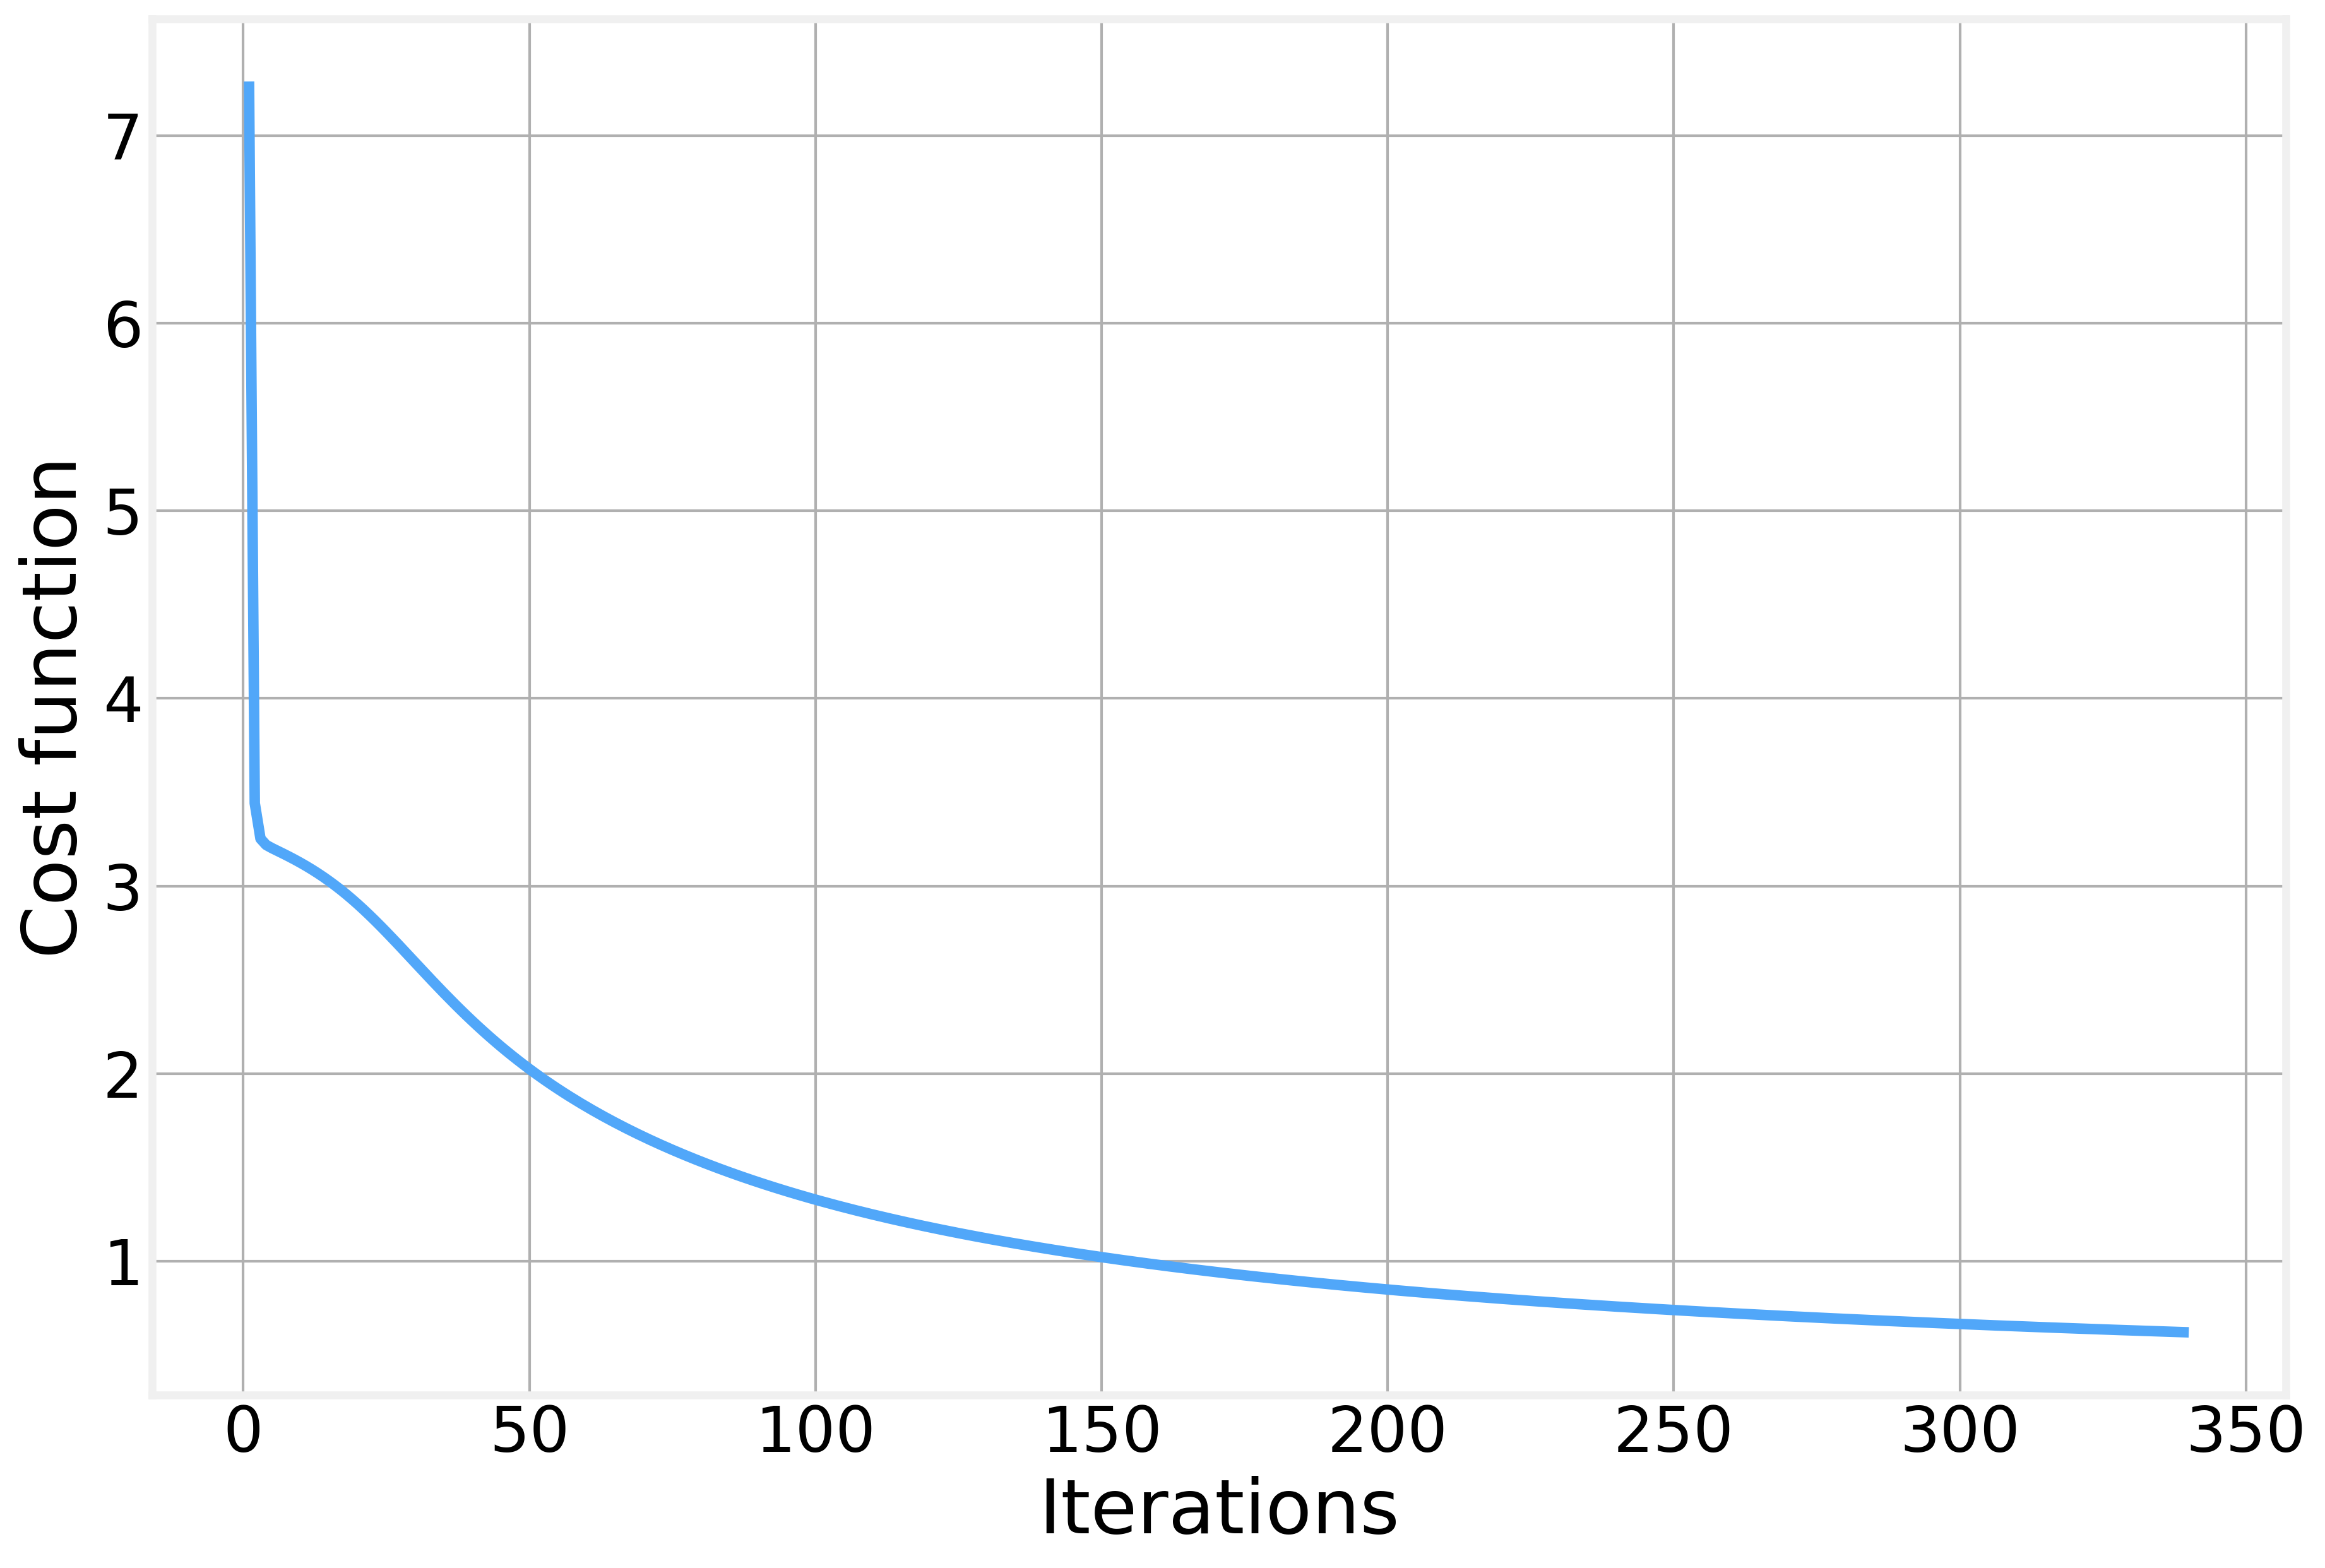

In [17]:
plt.plot(np.arange(1, len(J_val)+1), J_val)
plt.xlabel("Iterations")
plt.ylabel("Cost function")

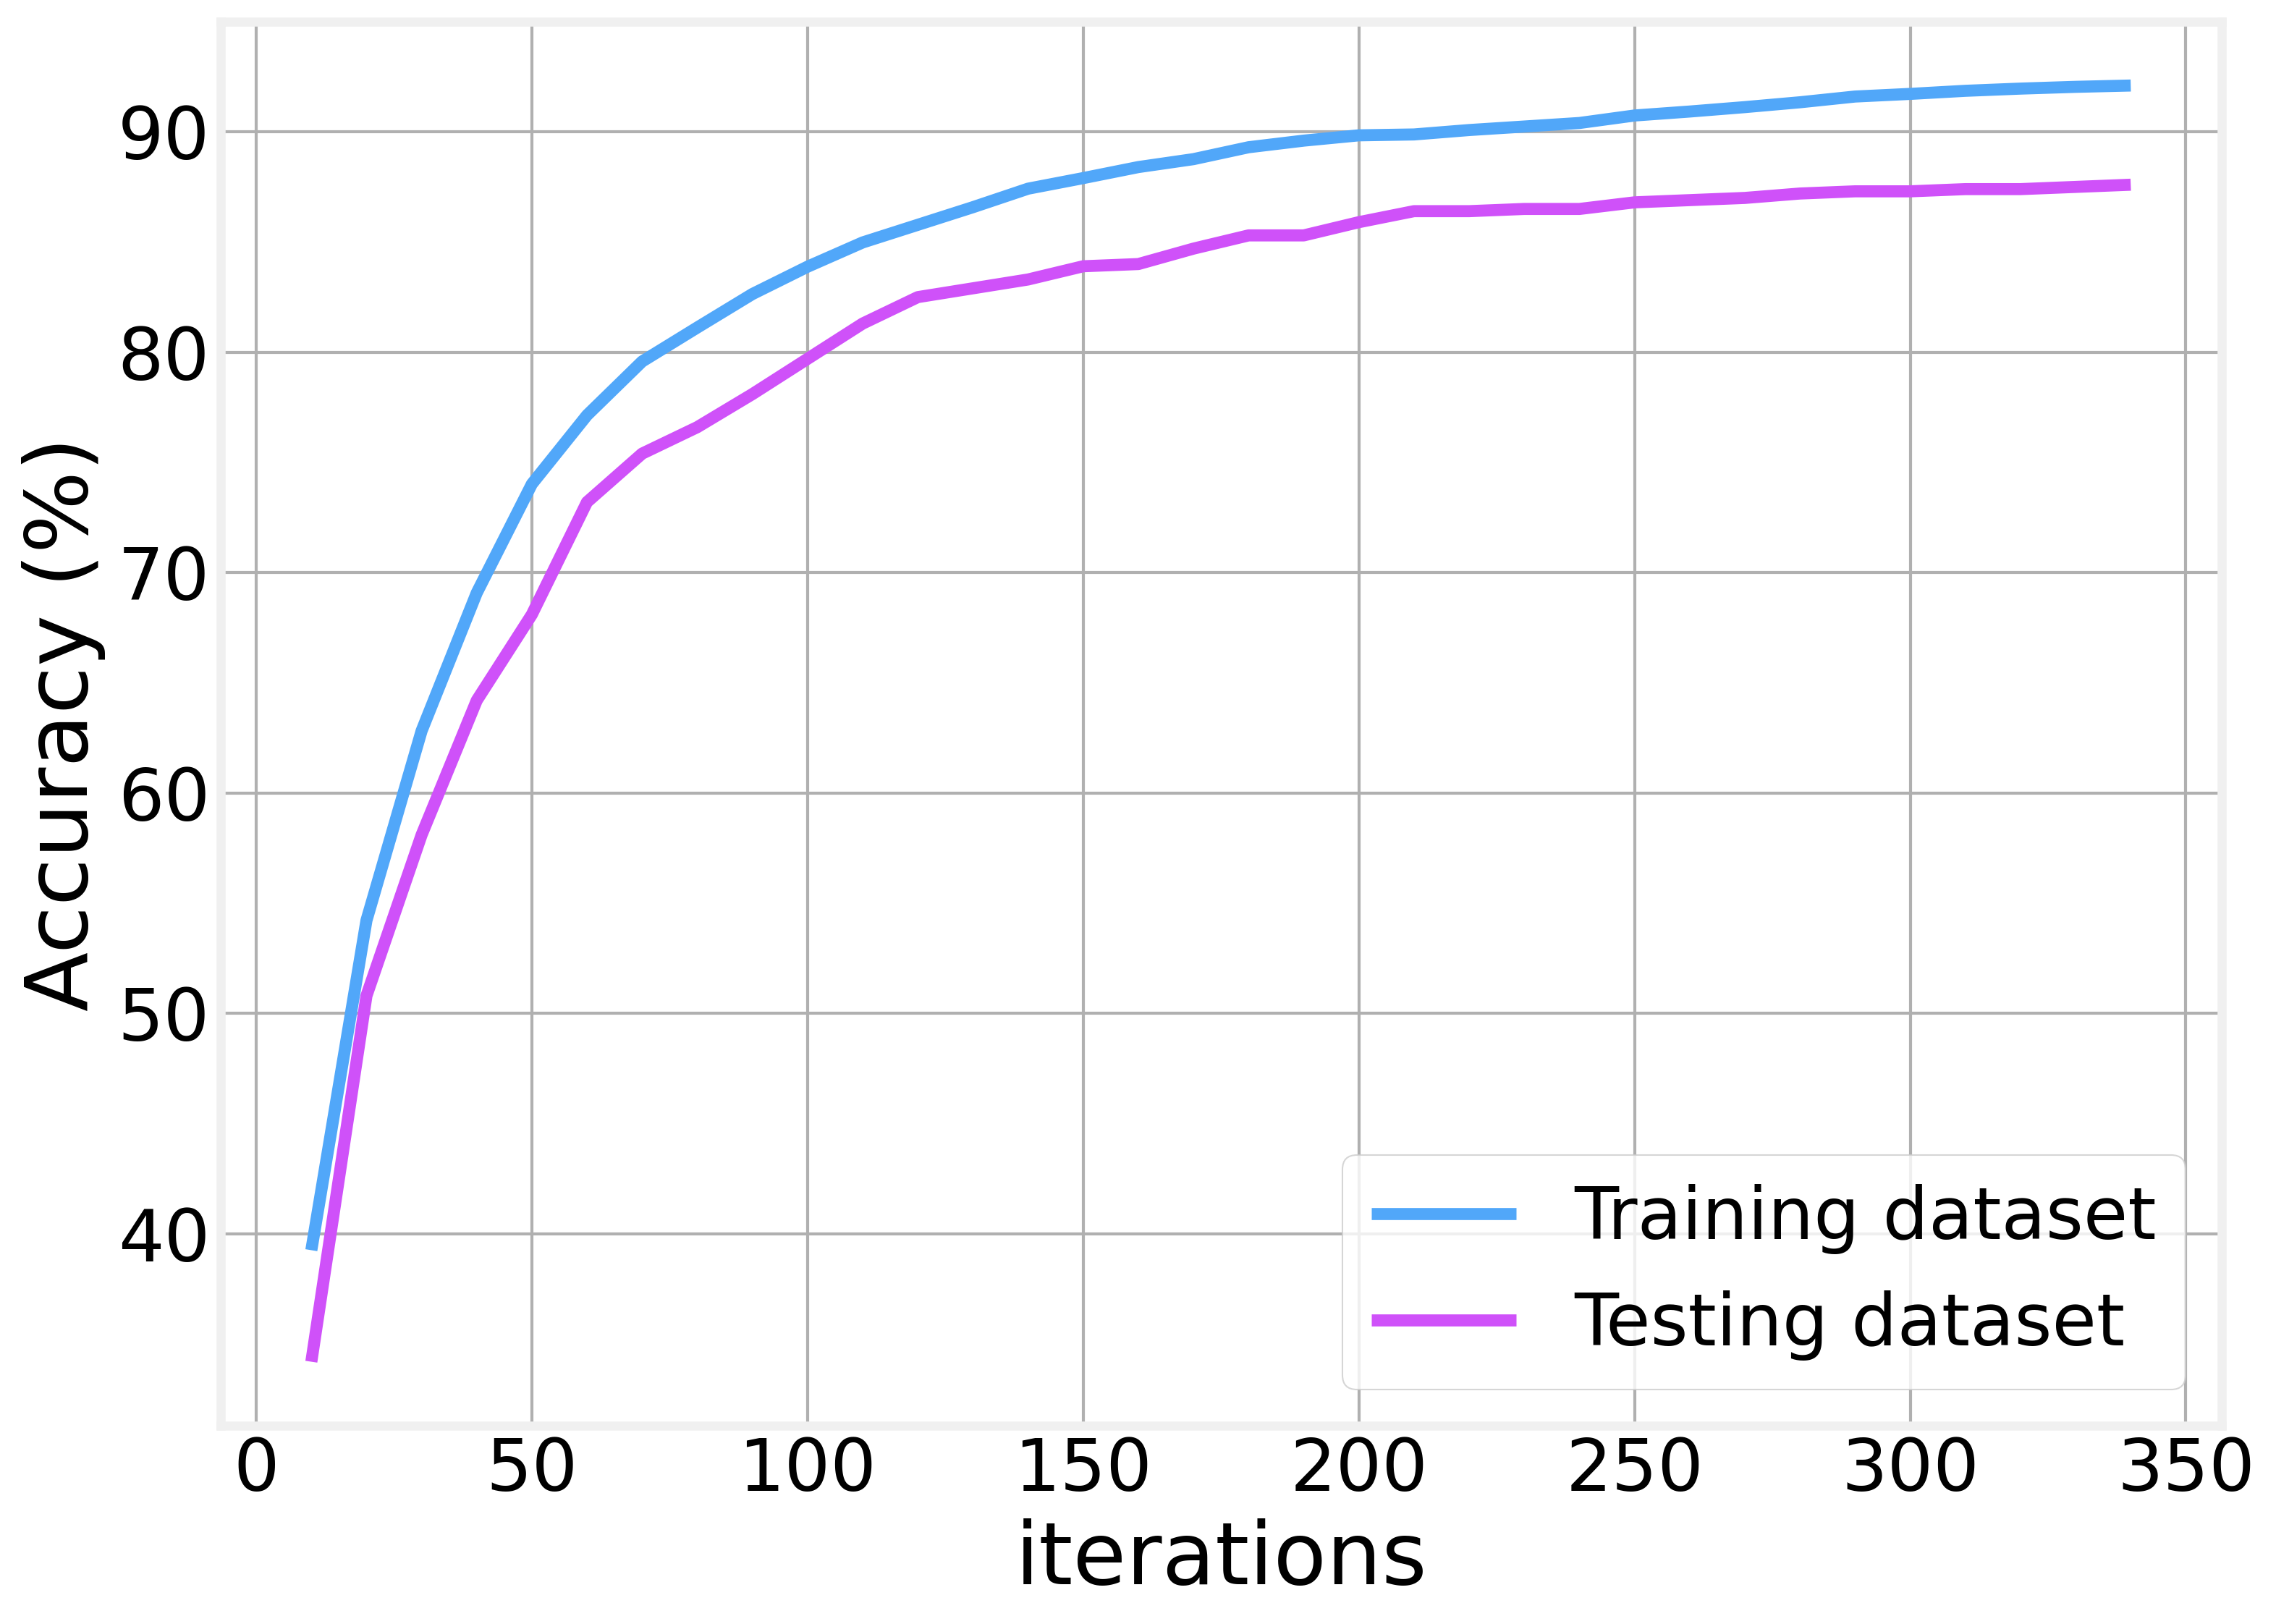

In [18]:
plt.plot(steps, acc_train, label='Training dataset')
plt.plot(steps, acc_test, label='Testing dataset')
plt.xlabel("iterations")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.gcf().set_size_inches(11, 8)

## Save the trained model

In [19]:
np.save('Theta1_short.npy', Theta1)
np.save('Theta2_short.npy', Theta2)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>